In [92]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1") #To load the data csv

In [16]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [66]:
# HYPOTHESIS:

# 1. Over the years the fatality of shark attacks has decreased? 
# 2. Majority of accidents that end in fatality happen during the night? If not, when?
# 3. Has the mortality of ie. surfing decreased over time? And what about the rest?

In [17]:
df.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
7208,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,2009.07.24.a,24-Jul-2009,2009.0,Invalid,SPAIN,Catalunya,Sant Salvador,Swimming,NaN,F,...,Shark involvement questionable,"ABC-Spain, 7/25/2009",2009.07.24.a-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.07.24.a,2009.07.24.a,5196.0,NaN,NaN
24293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2471,1993.09.26,26-Sep-1993,1993.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Danger Point,Spearfishing,Wimpie Bouwer,M,...,3 m [10'] white shark,"A. Gifford, GSAF",1993.09.26-Bouwer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.09.26,1993.09.26,3832.0,NaN,NaN
9447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(25723, 24)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [20]:
df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [22]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [23]:
df['Unnamed: 22'].unique()

array([nan, 'stopped here'], dtype=object)

In [24]:
df['Unnamed: 23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [28]:
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [30]:
df['Species '].unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [34]:
df['Case Number'].unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., 'ND.0001', '0',
       'xx'], dtype=object)

In [35]:
df['Year'].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [36]:
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [37]:
df.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)

In [38]:
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
22946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7395,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6824,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5596,1898.01.24,1898.01.24,1898.0,Unprovoked,SRI LANKA,NaN,Colombo Harbor,Swimming,2 U.S. Marines,M,...,Y,01h00,NaN,"U.S.Life-Saving Annual Report, 1913",1898.01.24-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1898.01.24,1898.01.24,707.0


In [45]:
df.sample(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
1312,2007.11.04,04-Nov-2007,2007.0,Unprovoked,USA,Florida,"Round Island Park, Indian River County",Surfing,Jeffrey Nolan,M,...,N,09h00,5' shark,"T.C. Palm, 11/4/2007 & 11/5/2007",2007.11.04-Nolan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.11.04,2007.11.04,4991.0
4318,1954.12.09,09-Dec-1954,1954.0,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kila Beach, Port Moresby",Swimming near canoe,Leva Kailovo,M,...,Y,13h20,NaN,"C.H. Hodgson; A. M. Rapson, p.148",1954.12.09-Kailovo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1954.12.09,1954.12.09,1985.0
19558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,2008.07.23,23-Jul-2008,2008.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Troy Zettle,M,...,N,14h30,NaN,"S. Petersohn, GSAF",2008.07.23-Zettle.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.07.23,2008.07.23,5071.0
9930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4091,1959.06.14.a,14-Jun-1959,1959.0,Unprovoked,USA,California,"La Jolla, San Diego County",Free diving for abalone,Robert Pamperin,M,...,Y,17h10,"Reported to involve a White shark, 6 m to 7m [...","D. Miller & R. Collier; R. Collier, pp. 21-24",1959.06.14.a-Pamperin_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1959.06.14.a,1959.06.14.a,2212.0
10444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6435,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['Injury'].unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [43]:
df['Country'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [44]:
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [62]:
df['Activity'].value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64

In [61]:
list(df['Activity'].unique())

['Paddling',
 'Standing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding sharks',
 'Boogie boarding',
 'Scuba diving',
 'Paddle-skiing',
 'Body boarding',
 'Windsurfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Scuba Diving',
 'Kayak fishing for sharks',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 nan,
 'Diving',
 'Fishing / Wading',
 '2 boats capsized',
 'Night bathing',
 'Surfing ',
 'Kayaking / Fishing',
 'Kayaking',
 'Body surfing',
 'Swimming, poaching abalone',
 'Canoeing',
 'SUP',
 'Skimboarding',
 'Touching a shark',
 'Fishing ',
 'Attempting to lasso a shark',
 'Photo shoot',
 'Paddle boarding',
 'Kakaying',
 'Washing hands',
 'Grabbing shark for a selfie',
 'Kayak fishing',
 'Tagging sharks',
 'Surf skiing ',
 'Surf fishing',
 'Floating',
 'Cage Diving',
 'Surfng',
 'SUP Foil boarding',
 'Lobstering',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing for squid',
 'Fishing for sharks',
 'Floating in tube',
 'Teasing a shar

In [47]:
df['Species '].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [50]:
df['Sex '].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex , dtype: int64

In [51]:
df['Time'].value_counts()

Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: Time, Length: 366, dtype: int64

In [69]:
list(df['Time'].unique())

['18h00',
 '14h00  -15h00',
 '07h45',
 nan,
 'Late afternoon',
 '17h00',
 '14h00',
 'Morning',
 '15h00',
 '08h15',
 '11h00',
 '10h30',
 '10h40',
 '16h50',
 '07h00',
 '09h30',
 'Afternoon',
 '21h50',
 '09h40',
 '08h00',
 '17h35',
 '15h30',
 '07h30',
 '19h00, Dusk',
 'Night',
 '16h00',
 '15h01',
 '12h00',
 '13h45',
 '23h30',
 '09h00',
 '14h30',
 '18h30',
 '12h30',
 '16h30',
 '18h45',
 '06h00',
 '10h00',
 '10h44',
 '13h19',
 'Midday',
 '13h30',
 '10h45',
 '11h20',
 '11h45',
 '19h30',
 '08h30',
 '15h45',
 'Shortly before 12h00',
 '17h34',
 '17h10',
 '11h15',
 '08h50',
 '17h45',
 '13h00',
 '10h20',
 '13h20',
 '02h00',
 '09h50',
 '11h30',
 '17h30',
 '9h00',
 '10h43',
 'After noon',
 '15h15',
 '15h40',
 '19h05',
 '1300',
 '14h30 / 15h30',
 '22h00',
 '16h20',
 '14h34',
 '15h25',
 '14h55',
 '17h46',
 'Morning ',
 '15h49',
 '19h00',
 'Midnight',
 '09h30 / 10h00',
 '10h15',
 '18h15',
 '04h00',
 '14h50',
 '13h50',
 '19h20',
 '10h25',
 '10h45-11h15',
 '16h45',
 '15h52',
 '06h15',
 '14h40',
 '19h45'

In [73]:
df['Injury'].value_counts()

FATAL                                                                                     802
Survived                                                                                   97
Foot bitten                                                                                87
No injury                                                                                  82
Leg bitten                                                                                 72
                                                                                         ... 
Cut foot, but injury caused by fishing line, not the shark                                  1
Left foot bitten after he accidentally stepped on the shark         PROVOKED INCIDENT       1
2 puncture wounds in left leg                                                               1
PROVOKED INCIDENT    Knee bitten by shark trapped in net                                    1
FATAL. "Shark bit him in half, carrying away the lower extre

In [ ]:
# Igual aqui puedo meter una formula / funcion para cada tipo de hora? si empieza por 14 pues afternoon...

In [52]:
df['Fatal (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [90]:
df['Fatal (Y/N)'].replace({' N': 'N', 'M': 'UNKNOWN', '2017': 'UNKNOWN', 'N ': 'N', 'y': 'Y'}, inplace=True)

In [91]:
df['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
UNKNOWN      73
Name: Fatal (Y/N), dtype: int64

In [102]:
df[(df['Year']>=1750)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,1764.00.00,1764,1764.0,Unprovoked,SPAIN,NaN,Guadalquivir River,Swimming,male,M,...,Y,NaN,NaN,"C. Moore, GSAF",1764.00.00-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1764.00.00,1764.00.00,155.0
6149,1758.00.00,1758,1758.0,Unprovoked,MEDITERRANEAN SEA,NaN,NaN,Fell overboard from a frigate & was swallowed ...,sailor,M,...,N,NaN,"""The fish was harpooned, dried, and presented ...",A.M. Hodgkin,1758.00.00-Mediterranean.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1758.00.00,1758.00.00,154.0
6150,1753.10.27.R,Reported 27-Oct-1753,1753.0,Unprovoked,JAMAICA,NaN,Kingston Harbor,Fell overboard,male,M,...,Y,NaN,NaN,"Maryland Gazette, 1/31/1754",1753.10.27.R-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1753.10.27.R,1753.10.27.R,153.0
6151,1751.07.27,27-Jul-1751,1751.0,Unprovoked,USA,Massachusetts,NaN,Swimming,male,M,...,Y,NaN,NaN,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

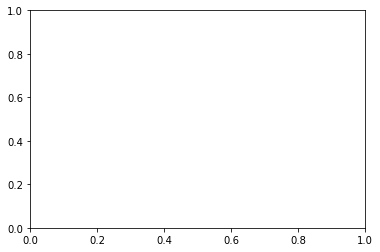

In [105]:
sns.histplot(data=df, x=(df['Year']>=1750), hue='Fatal (Y/N)', multiple='stack')

In [75]:
df['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1786.0      1
1785.0      1
1784.0      1
1783.0      1
1815.0      1
Name: Year, Length: 249, dtype: int64

In [112]:
print(list(df['Year'].unique()))

[2018.0, 2017.0, nan, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0, 1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0, 1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0, 1908.0, 1907.0, 1906.0, 1905.0, 1904.0, 1903.0, 1902.0, 1901.0, 1900.0, 1899.0, 1898.0, 1897.0, 1896.0, 18

In [85]:
df.loc[df['Year'] == 5.0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6176,0005.00.00,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0


In [87]:
df.loc[df['Year'] == 77.0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6175,0077.00.00,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,...,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0


In [88]:
df.loc[df['Year'] == 500.0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6174,0500.00.00,Circa 500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,...,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0


In [86]:
df.loc[df['Year'] == 0.0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,...,Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,...,Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,...,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [67]:
# HYPOTHESIS 3

In [56]:
df.groupby(['Activity', 'Fatal (Y/N)']).count()

,,Case Number,Date,Year,Type,Country,Area,Location,Name,Sex,Age,Injury,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Activity,Fatal (Y/N),,,,,,,,,,,,,,,,,,,,
,N,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1
,N,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
a canoe was pursuing a schooner that had forcibily abducted 5 young girls,Y,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1,1
"""Boat accident""",Y,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1
"""Climbing up to ship after repairing the stern in water""",Y,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ship William Penn grounded & broke apart,N,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1
ship torpedoed 400 miles off the African coas. Man was clinging to hatch cover,N,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1
wreck of the State Oil Company ship Permina,Y,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1


In [110]:
act_surfing = re.findall('surfing.*', df['Activity'])

TypeError: expected string or bytes-like object

In [71]:
# HYPOTHESIS #2 Majority of accidents that end in fatality happen during the night? If not, when?

In [72]:
df.sample(7)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2667,1989.09.03,03-Sep-1989,1989.0,Provoked,USA,California,24 km off Santa Catalina Island in the Channel...,Filming 5' blue shark,Larry Stroup,M,...,N,NaN,Blue Shark,"R. Collier, p. xxvi; Orlando Sentinel, 9/6/19...",1989.09.03-Stroup.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.09.03,1989.09.03,3636.0
10093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,2008.12.27.a,27-Dec-2008,2008.0,Unprovoked,AUSTRALIA,Western Australia,Port Kennedy Beach,Snorkeling,Brian Guest,M,...,Y,07h00,4 to 5m white shark,"T. Peake, GSAF",2008.12.27.a-Guest.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.12.27.a,2008.12.27.a,5121.0
4775,1940.01.01,01-Jan-1940,1940.0,Unprovoked,AUSTRALIA,Queensland,"Malagil, Barrier Reef",Diving for trochus,native diver,M,...,N,NaN,NaN,"J. Green, p.33; V.M. Coppleson (1958), p.245",1940.01.01-native-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.01.01,1940.01.01,1528.0
12062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
print(list(df['Time'].unique()))

['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00', '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40', '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00', '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00', '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19', 'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30', '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15', '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50', '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40', '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34', '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00', 'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50', '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52', '06h15', '14h40', '19h45', '10h10', '08h45', 'Evening', '12h10', '18h05', '11h41', '12h25', '17h51', '16h12', '12h45'

In [156]:
df['Time'].replace({'18h00': 'Evening', '14h00  -15h00': 'Afternoon', '07h45': 'Morning', 'Late afternoon': 'Afternoon', '17h00': 'Afternoon', 'Midday': 'Afternoon', 'Shortly before 12h00': 'Morning', 'After noon': 'Afternoon', 'Morning ': 'Morning', 'Midnight': 'Night', 'Sometime between 06h00 & 08hoo': 'Morning', 'Early afternoon': 'Afternoon', 'Just before noon': 'Morning', 'Early morning': 'Morning', 'Dawn': 'Night', 'Dusk': 'Night', 'Lunchtime': 'Afternoon', 'Before 07h00': 'Night', '"Just before 11h00"': 'Morning', 'Between 05h00 and 08h00': 'Morning', '>08h00': 'Morning', 'AM': 'Morning', 'A.M.': 'Morning', 'Sunset': 'Evening', '"Evening"': 'Evening', 'Just before sundown': 'Evening', '--': 'Nan', 'Just after 12h00': 'Afternoon', 'Early Morning': 'Morning', 'Shortly after midnight': ' Night', '\xa0 ': 'Nan', '20h45 (Sunset)': 'Night', 'Late morning': 'Morning', '19h00, Dusk': 'Evening', 'Shortly before 13h00': 'Afternoon', 'Possibly same incident as 2000.08.21': 'Nan', 'After Dusk': 'Evening', 'Noon': 'Afternoon', ' Night': 'Night', 'P.M.': 'Evening', '8:04 pm': 'Evening', '2 hours after Opperman': 'NaN', 'Mid afternoon': 'Afternoon', 'Mid morning': 'Morning', '"Night"': 'Night', '30 minutes after 1992.07.08.a': 'Nan', '>06h45': 'Morning', 'Between 06h00 & 07h20': 'Morning', '<07h30': 'Morning', '17h00 Sunset': 'Evening', 'Nightfall': 'Night', 'X': 'NaN', '18h30 (Sunset)': 'Evening', 'Prior to 10h37': 'Morning', 'Daybreak': 'Afternoon', '>12h00': 'Afternoon', 'Mid-morning': 'Morning', 'Just before dawn': 'Night', 'Daytime': 'Morning', 'Dark': 'Night', '"After lunch"': 'Afternoon', 'After dusk': 'Night', 'FATAL  (Wire netting installed at local beaches after this incident.)': 'NaN', 'After midnight': 'Night', 'Late afternon': 'Afternoon', '"Early evening"': 'Evening', 'Late Afternoon': 'Afternoon', '   ': 'NaN', 'Before daybreak': 'Morning', 'dusk': 'Night', 'Before 10h30': 'Morning', '>17h00': 'Evening', 'night': 'Night', 'Late night': 'Night', 'Midday.': 'Afternoon', '"After dark"': 'Night', '2 hrs before sunset': 'Evening', '"shortly before dusk"': 'Night', 'Between 11h00 & 12h00': 'Morning', 'After 04h00': 'Night', 'Ship aban-doned at 03h10': 'Night', '>17h30': 'Evening', '>14h30': 'Afternoon', '11h01 -time of ship sinking': 'Morning'}, inplace=True)

In [157]:
print(list(df['Time'].unique()))

['Evening', 'Afternoon', 'Morning', nan, '15h00', '08h15', '11h00', '10h30', '10h40', '16h50', '07h00', '09h30', '21h50', '09h40', '08h00', '17h35', '15h30', '07h30', 'Night', '16h00', '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30', '15h45', '17h34', '17h10', '11h15', '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50', '11h30', '17h30', '9h00', '10h43', '15h15', '15h40', '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34', '15h25', '14h55', '17h46', '15h49', '19h00', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50', '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52', '06h15', '14h40', '19h45', '10h10', '08h45', '12h10', '18h05', '11h41', '12h25', '17h51', '16h12', '12h45', '10h50', '14h15', '09h45', '06h45', '05h00', '03h30', '06h30', '17h20', '20h00', '16h40', '16h18', '11h10', '17h50', '07h00 - 08h00', '18h15-18h30', '17h01'

In [159]:
def first_2letters(s):
    if str(s[:2]) == '01':
        return 'Night'
    if str(s[:2]) == '02':
        return 'Night'
    if str(s[:2]) == '03':
        return 'Night'
    if str(s[:2]) == '04':
        return 'Night'
    if str(s[:2]) == '05':
        return 'Night'
    if str(s[:2]) == '06':
        return 'Morning'
    if str(s[:2]) == '07':
        return 'Morning'
    if str(s[:2]) == '08':
        return 'Morning'
    if str(s[:2]) == '09':
        return 'Morning'
    if str(s[:2]) == '10':
        return 'Morning'
    if str(s[:2]) == '11':
        return 'Morning'
    if str(s[:2]) == '12':
        return 'Afternoon'
    if str(s[:2]) == '13':
        return 'Afternoon'
    if str(s[:2]) == '14':
        return 'Afternoon'
    if str(s[:2]) == '15':
        return 'Afternoon'
    if str(s[:2]) == '16':
        return 'Afternoon'
    if str(s[:2]) == '17':
        return 'Evening'
    if str(s[:2]) == '18':
        return 'Evening'
    if str(s[:2]) == '19':
        return 'Evening'
    if str(s[:2]) == '20':
        return 'Night'
    if str(s[:2]) == '21':
        return 'Night'
    if str(s[:2]) == '22':
        return 'Night'
    if str(s[:2]) == '23':
        return 'Night'
    if str(s[:2]) == '24':
        return 'Night'
    else:
        return s

In [160]:
df['Time2'] = df['Time'].apply(first_2letters)

TypeError: 'float' object is not subscriptable